In [2]:
MAIN_DIR = "../output/bigdatacluster/randomizedOutput/"

In [3]:
import os
import pandas as pd
import dill
import json
import numpy as np
import warnings; warnings.simplefilter('ignore')
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [14]:
experiment_folders = [x for x in os.listdir(MAIN_DIR) if os.path.isdir(os.path.join(MAIN_DIR, x))]

In [15]:
experiment_folders, len(experiment_folders)

(['experiment_adj23',
  'experiment_adj29',
  'experiment_adj20',
  'experiment_adj21',
  'experiment_adj44',
  'experiment_adj36',
  'experiment_adj18',
  'experiment_adj17',
  'experiment_adj53',
  'experiment_adj34',
  'experiment_adj49',
  'experiment_adj35',
  'experiment_adj31',
  'experiment_adj55',
  'experiment_adj9',
  'experiment_adj26',
  'experiment_adj38',
  'experiment_adj54',
  'experiment_adj10',
  'experiment_adj25',
  'experiment_adj39',
  'experiment_adj30',
  'experiment_adj52',
  'experiment_adj4',
  'experiment_adj58',
  'experiment_adj37',
  'experiment_adj46',
  'experiment_adj5',
  'experiment_adj27',
  'experiment_adj48',
  'experiment_adj7',
  'experiment_adj47',
  'experiment_adj41',
  'experiment_adj24',
  'experiment_adj57',
  'experiment_adj3',
  'experiment_adj8',
  'experiment_adj60',
  'experiment_adj6',
  'experiment_adj42',
  'experiment_adj16',
  'experiment_adj28',
  'experiment_adj59',
  'experiment_adj51',
  'experiment_adj2',
  'experiment_adj3

In [6]:
data_dict = defaultdict(list)

In [7]:
for experiment in experiment_folders:
    full_dir = os.path.join(MAIN_DIR, experiment)
    for severity_dir in [x for x in os.listdir(full_dir) if os.path.isdir(os.path.join(full_dir, x))]:
        full_seve_dir = os.path.join(full_dir, severity_dir, f"AgebetweenNonetNone_{severity_dir}_percentile_minmax")
        for beh_dir in [x for x in os.listdir(full_seve_dir) if os.path.isdir(os.path.join(full_seve_dir, x))]:
            full_beh_dir = os.path.join(full_seve_dir, beh_dir)
            
            df_pseudo = pd.read_csv(os.path.join(full_beh_dir, "pseudo_metrics.csv"))
            df_pseudo['avg'] = df_pseudo[['acc','f1']].mean(axis=1)
            best_rfe, best_clc = df_pseudo[['RFE','Metrics']].iloc[df_pseudo['avg'].argmax()]
            
            with open(os.path.join(full_beh_dir, "selected_feats.json"), 'r') as f:
                rfe_dict = json.load(f)
            feats = rfe_dict[best_rfe]
            
            with open(os.path.join(full_beh_dir, "ML_obj.p"), 'rb') as f:
                ML_obj = dill.load(f)
            
            clc = ML_obj[best_rfe][best_clc]
            data_dict['exp'].append(experiment)
            data_dict['sev'].append(severity_dir)
            data_dict['beh'].append(beh_dir.split('_')[-1])
            data_dict['rfe'].append(best_rfe)
            data_dict['clc'].append(best_clc)
            data_dict['feats'].append(feats)
            data_dict['hyper_params'].append(clc.best_params_)
            data_dict['clc_score'].append(clc.best_score_)
            data_dict['pseudo_acc'].append(df_pseudo['acc'].iloc[df_pseudo['avg'].argmax()])
            data_dict['pseudo_f1'].append(df_pseudo['f1'].iloc[df_pseudo['avg'].argmax()])
            

            
df_results = pd.DataFrame(data_dict)

In [8]:
df_results.shape

(918, 10)

In [9]:
df_results

,exp,sev,beh,rfe,clc,feats,hyper_params,clc_score,pseudo_acc,pseudo_f1
0,experiment_adj23,mild_TD,mot,lgbm,svm,"[area_lcaudalanteriorcingulate_PERC20, area_rp...","{'kernel': 'poly', 'gamma': 'scale', 'degree':...",0.655584,0.872549,0.480000
1,experiment_adj23,mild_TD,tot,lsvm,lsvm,"[area_lbankssts_PERC60, area_lcaudalmiddlefron...","{'penalty': 'l2', 'loss': 'hinge', 'C': 5}",0.916071,0.989247,0.933333
2,experiment_adj23,mild_TD,awa,lsvm,lr,"[area_lbankssts_PERC20, area_lcuneus_PERC60, a...","{'solver': 'newton-cg', 'penalty': 'none', 'C'...",0.853747,0.971154,0.888889
3,experiment_adj23,mild_TD,cog,lr,lr,"[area_lcaudalanteriorcingulate_PERC20, area_lc...","{'solver': 'newton-cg', 'penalty': 'none', 'C'...",0.759470,0.910000,0.571429
4,experiment_adj23,mild_TD,man,lsvm,lsvm,"[area_lbankssts_PERC20, area_lcaudalmiddlefron...","{'penalty': 'l2', 'loss': 'hinge', 'C': 5}",0.928889,0.989247,0.941176
...,...,...,...,...,...,...,...,...,...,...
913,experiment_adj45,moderate_TD,cog,lsvm,lsvm,"[area_lbankssts_PERC60, area_lcaudalanteriorci...","{'penalty': 'l2', 'loss': 'hinge', 'C': 5}",0.766818,0.888889,0.600000
914,experiment_adj45,moderate_TD,man,lsvm,lsvm,"[area_lentorhinal_PERC20, area_lfusiform_PERC2...","{'penalty': 'l2', 'loss': 'squared_hinge', 'C'...",0.762736,0.893204,0.685714
915,experiment_adj45,moderate_TD,mot,lsvm,svm,"[area_lbankssts_PERC20, area_lbankssts_PERC40,...","{'kernel': 'poly', 'gamma': 'auto', 'degree': ...",0.870847,0.947826,0.863636
916,experiment_adj45,moderate_TD,comm,lr,lsvm,"[area_lbankssts_PERC60, area_lfusiform_PERC60,...","{'penalty': 'l2', 'loss': 'hinge', 'C': 10}",0.796479,0.896226,0.702703


# Pick the best trial for severity and behavioral models to be used for production (Phase II)

In [10]:
def get_best_severity_behavioral(df, sev, beh):
    sub_df = df[(df['sev']==sev)&(df['beh']==beh)]
    sub_df['tot'] =  sub_df['clc_score']+ sub_df['pseudo_acc'] 
    return sub_df.iloc[sub_df['tot'].argmax()]
        

In [11]:
# Optimize wrt to the number of features
def get_best_severity_behavioral(df, sev, beh):
    sub_df = df[(df['sev']==sev)&(df['beh']==beh)]
    sub_df['tot'] =  (sub_df['clc_score']+ sub_df['pseudo_acc'] + sub_df['pseudo_f1'])/3 - len(sub_df['feats'])/1088
    return sub_df.iloc[sub_df['tot'].argmax()]
        

In [12]:
best_data_dict = defaultdict(dict)
for sev in ['mild_TD', 'moderate_TD', 'sever_TD']:
    for beh in ['awa','comm','man','cog','mot', 'tot']:
        best_data_dict[sev][beh] = get_best_severity_behavioral(df_results, sev, beh).to_dict()

In [13]:
with open('best_results_dict.json', 'w') as f:
    json.dump(best_data_dict, f)

In [14]:
len(best_data_dict['mild_TD']['cog']['feats']),best_data_dict['mild_TD']['cog']['clc_score'], best_data_dict['mild_TD']['cog']['pseudo_f1']

(96, 0.9397727272727273, 0.9565217391304348)

# `severity_dict` is the base of the analysis 

# Question #1  

In [15]:
df_results.groupby('sev')[['clc_score','pseudo_acc', 'pseudo_f1']].mean()

,clc_score,pseudo_acc,pseudo_f1
sev,,,
mild_TD,0.809762,0.949962,0.741832
moderate_TD,0.784512,0.898685,0.708267
sever_TD,0.811907,0.884919,0.756750


In [16]:
df_results.groupby('sev')[['clc_score','pseudo_acc', 'pseudo_f1']].max()

,clc_score,pseudo_acc,pseudo_f1
sev,,,
mild_TD,0.976573,1.000000,1.000000
moderate_TD,0.928182,0.981481,0.950000
sever_TD,0.921406,0.965217,0.914286


In [17]:
df_results[df_results['sev']=='mild_TD'].groupby('beh')[['clc_score','pseudo_acc', 'pseudo_f1']].mean().sort_values(by="pseudo_f1"), df_results[df_results['sev']=='mild_TD'].groupby('beh')[['clc_score','pseudo_acc', 'pseudo_f1']].std().sort_values(by="pseudo_f1")

(      clc_score  pseudo_acc  pseudo_f1
 beh                                   
 mot    0.750604    0.921953   0.580943
 comm   0.775008    0.938113   0.692704
 cog    0.824324    0.943529   0.709760
 awa    0.828893    0.945513   0.775171
 man    0.832211    0.966266   0.805268
 tot    0.847535    0.984398   0.887143,
       clc_score  pseudo_acc  pseudo_f1
 beh                                   
 tot    0.074592    0.014153   0.101419
 awa    0.074454    0.024070   0.113311
 man    0.097422    0.019476   0.113463
 mot    0.123316    0.028815   0.162780
 comm   0.119917    0.034699   0.170160
 cog    0.090609    0.037354   0.209597)

In [70]:
df_results[df_results['sev']=='moderate_TD'].groupby('beh')[['clc_score','pseudo_acc', 'pseudo_f1']].mean().sort_values(by="pseudo_f1")

,clc_score,pseudo_acc,pseudo_f1
beh,,,
awa,0.748909,0.863532,0.600882
mot,0.750832,0.866304,0.644425
comm,0.808881,0.903302,0.732130
cog,0.788693,0.924769,0.779233
tot,0.827745,0.931604,0.804481
man,0.835560,0.935680,0.819339


In [71]:
df_results[df_results['sev']=='sever_TD'].groupby('beh')[['clc_score','pseudo_acc', 'pseudo_f1']].mean().sort_values(by="pseudo_f1")

,clc_score,pseudo_acc,pseudo_f1
beh,,,
awa,0.852750,0.901136,0.717578
tot,0.796316,0.847561,0.746961
comm,0.840792,0.870798,0.774083
cog,0.813304,0.911184,0.792893
mot,0.827635,0.931522,0.824504
man,0.838471,0.900826,0.825419


In [73]:
df_results

,exp,sev,beh,rfe,clc,feats,hyper_params,clc_score,pseudo_acc,pseudo_f1
0,experiment_adj24,mild_TD,awa,lsvm,lsvm,"[area_lentorhinal_PERC60, area_lfusiform_PERC6...","{'penalty': 'l2', 'loss': 'hinge', 'C': 10}",0.889666,0.942308,0.769231
1,experiment_adj24,mild_TD,cog,lsvm,lr,"[area_lmiddletemporal_PERC60, area_lparsopercu...","{'solver': 'newton-cg', 'penalty': 'none', 'C'...",0.737500,0.940000,0.727273
2,experiment_adj24,mild_TD,comm,lsvm,svm,"[area_lentorhinal_PERC80, area_lfusiform_PERC6...","{'kernel': 'poly', 'gamma': 'scale', 'degree':...",0.720834,0.927083,0.695652
3,experiment_adj24,mild_TD,man,lr,lr,"[area_lbankssts_PERC60, area_lcaudalmiddlefron...","{'solver': 'newton-cg', 'penalty': 'none', 'C'...",0.774798,0.946237,0.705882
4,experiment_adj24,mild_TD,mot,lsvm,lr,"[area_lentorhinal_PERC60, area_linferiorpariet...","{'solver': 'newton-cg', 'penalty': 'none', 'C'...",0.841129,0.970588,0.869565
...,...,...,...,...,...,...,...,...,...,...
139,experiment_adj31,sever_TD,cog,lr,svm,"[area_lcaudalanteriorcingulate_PERC40, area_le...","{'kernel': 'poly', 'gamma': 'auto', 'degree': ...",0.795850,0.929825,0.840000
140,experiment_adj31,sever_TD,comm,lsvm,lsvm,"[area_lcaudalanteriorcingulate_PERC80, area_lc...","{'penalty': 'l2', 'loss': 'hinge', 'C': 5}",0.903436,0.890756,0.805970
141,experiment_adj31,sever_TD,man,lr,ridge,"[area_lbankssts_PERC60, area_lcaudalanteriorci...","{'normalize': False, 'alpha': 0.2}",0.793503,0.900826,0.812500
142,experiment_adj31,sever_TD,mot,lsvm,lr,"[area_linsula_PERC80, area_listhmuscingulate_P...","{'solver': 'newton-cg', 'penalty': 'none', 'C'...",0.801613,0.930435,0.826087


<AxesSubplot:ylabel='Frequency'>

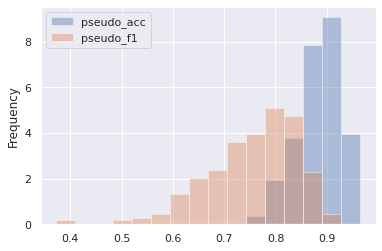

In [18]:
df_results[df_results['sev']=='sever_TD'][['pseudo_acc', 'pseudo_f1']].plot.hist(bins=16, density=True, alpha=0.4)

<AxesSubplot:ylabel='Frequency'>

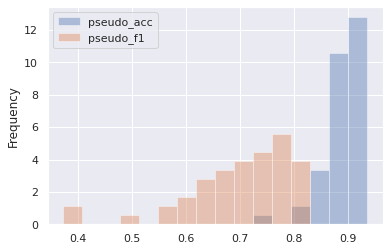

In [19]:
df_results[(df_results['sev']=='sever_TD')&(df_results['beh']=='awa')][['pseudo_acc', 'pseudo_f1']].plot.hist(bins=16, density=True, alpha=0.4)

<AxesSubplot:ylabel='Frequency'>

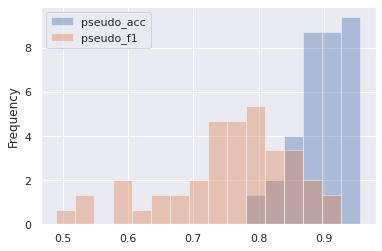

In [20]:
df_results[(df_results['sev']=='sever_TD')&(df_results['beh']=='cog')][['pseudo_acc', 'pseudo_f1']].plot.hist(bins=16, density=True, alpha=0.4)

<AxesSubplot:ylabel='Frequency'>

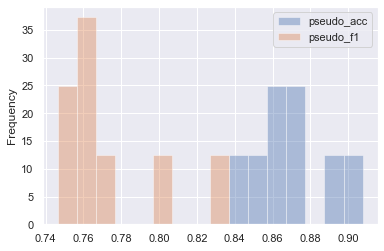

In [93]:
df_results[(df_results['sev']=='sever_TD')&(df_results['beh']=='comm')][['pseudo_acc', 'pseudo_f1']].plot.hist(bins=16, density=True, alpha=0.4)

<AxesSubplot:ylabel='Frequency'>

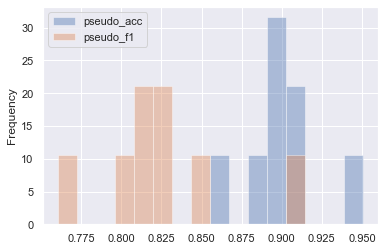

In [94]:
df_results[(df_results['sev']=='sever_TD')&(df_results['beh']=='man')][['pseudo_acc', 'pseudo_f1']].plot.hist(bins=16, density=True, alpha=0.4)

<AxesSubplot:ylabel='Frequency'>

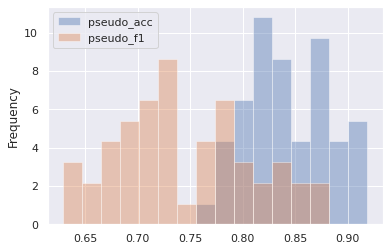

In [21]:
df_results[(df_results['sev']=='sever_TD')&(df_results['beh']=='tot')][['pseudo_acc', 'pseudo_f1']].plot.hist(bins=16, density=True, alpha=0.4)

<AxesSubplot:ylabel='Frequency'>

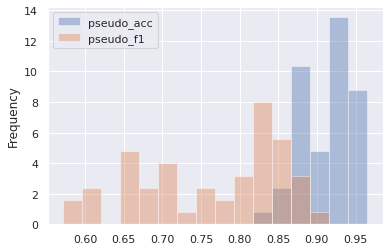

In [22]:
df_results[(df_results['sev']=='sever_TD')&(df_results['beh']=='mot')][['pseudo_acc', 'pseudo_f1']].plot.hist(bins=16, density=True, alpha=0.4)

<AxesSubplot:ylabel='Frequency'>

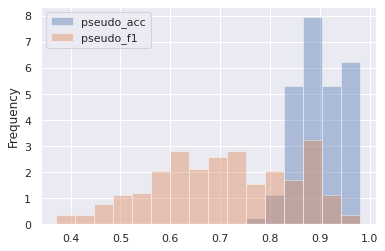

In [23]:
df_results[df_results['sev']=='moderate_TD'][['pseudo_acc', 'pseudo_f1']].plot.hist(bins=16, density=True, alpha=0.4)

<AxesSubplot:ylabel='Frequency'>

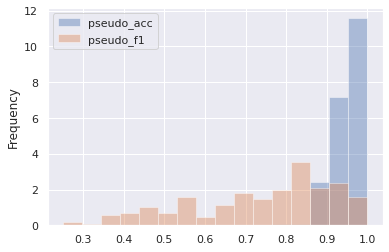

In [24]:
df_results[df_results['sev']=='mild_TD'][['pseudo_acc', 'pseudo_f1']].plot.hist(bins=16, density=True, alpha=0.4)

# Features Analyzer

## Analyze common features among the 50 experiments 

In [47]:
feats_sev_beh_counter = defaultdict(dict)
def _get_best_model(path):
    df = pd.read_csv(os.path.join(path, "group_df_beforeFixation.csv"), index_col=0)
    df = df.iloc[:, :df.columns.get_loc('volume_rtransversetemporal_PERC80')+1]
    df_pseudo = pd.read_csv(os.path.join(path, "pseudo_metrics.csv"))
    df_pseudo['avg'] = df_pseudo[['acc','f1']].mean(axis=1)
    best_rfe, best_clc = df_pseudo[['RFE','Metrics']].iloc[df_pseudo['avg'].argmax()]
    
    with open(os.path.join(path, 'FS_obj.p'), 'rb') as f:
        rfe_obj = dill.load(f)
    
    return df.columns[rfe_obj[best_rfe].support_]
    
for exp in experiment_folders:
    expfullpath = os.path.join(MAIN_DIR, exp)
    sever_fldrs = [x for x in os.listdir(expfullpath) if os.path.isdir(os.path.join(expfullpath, x))]
    for sev in sever_fldrs:
        sevfullpath = os.path.join(expfullpath, sev, f"AgebetweenNonetNone_{sev}_percentile_minmax")
        beh_fldr = [x for x in os.listdir(sevfullpath) if os.path.isdir(os.path.join(sevfullpath, x))]
        for beh in beh_fldr:
            behfullpath = os.path.join(sevfullpath, beh)
            feats = _get_best_model(behfullpath)
            if beh.split('_')[-1] not in feats_sev_beh_counter[sev.split('_')[0]]:
                feats_sev_beh_counter[sev.split('_')[0]][beh.split('_')[-1]] = dict()
                
            for f in feats:
                if f in feats_sev_beh_counter[sev.split('_')[0]][beh.split('_')[-1]]:
                    feats_sev_beh_counter[sev.split('_')[0]][beh.split('_')[-1]][f] += 1
                else:
                    feats_sev_beh_counter[sev.split('_')[0]][beh.split('_')[-1]][f] = 1
            
    

In [60]:
def feats_2_breg_cntr(feats_cntr_dict):
    breg = list(map(lambda kv: kv[0].split('_')[1], feats_cntr_dict.items()))
    breg = list(set(breg))
    breg_dict = {x: 0 for x in breg}
    for f, cnt in feats_cntr_dict.items():
        breg_dict[f.split('_')[1]] += cnt
    return breg_dict

In [51]:
sorted_feats_mild_mot = sorted(feats_sev_beh_counter['mild']['mot'].items(), key=lambda kv: kv[1], reverse=True)

In [61]:
breg_dict = feats_2_breg_cntr(feats_sev_beh_counter['mild']['mot'])

In [64]:
sorted_breg = sorted(breg_dict.items(), key=lambda kv: kv[1],reverse=True)

In [66]:
bname = list(map(lambda x: x[0], sorted_breg))
cnt = list(map(lambda x: x[1], sorted_breg))

In [72]:
len(bname)*0.05

3.4000000000000004

<AxesSubplot:>

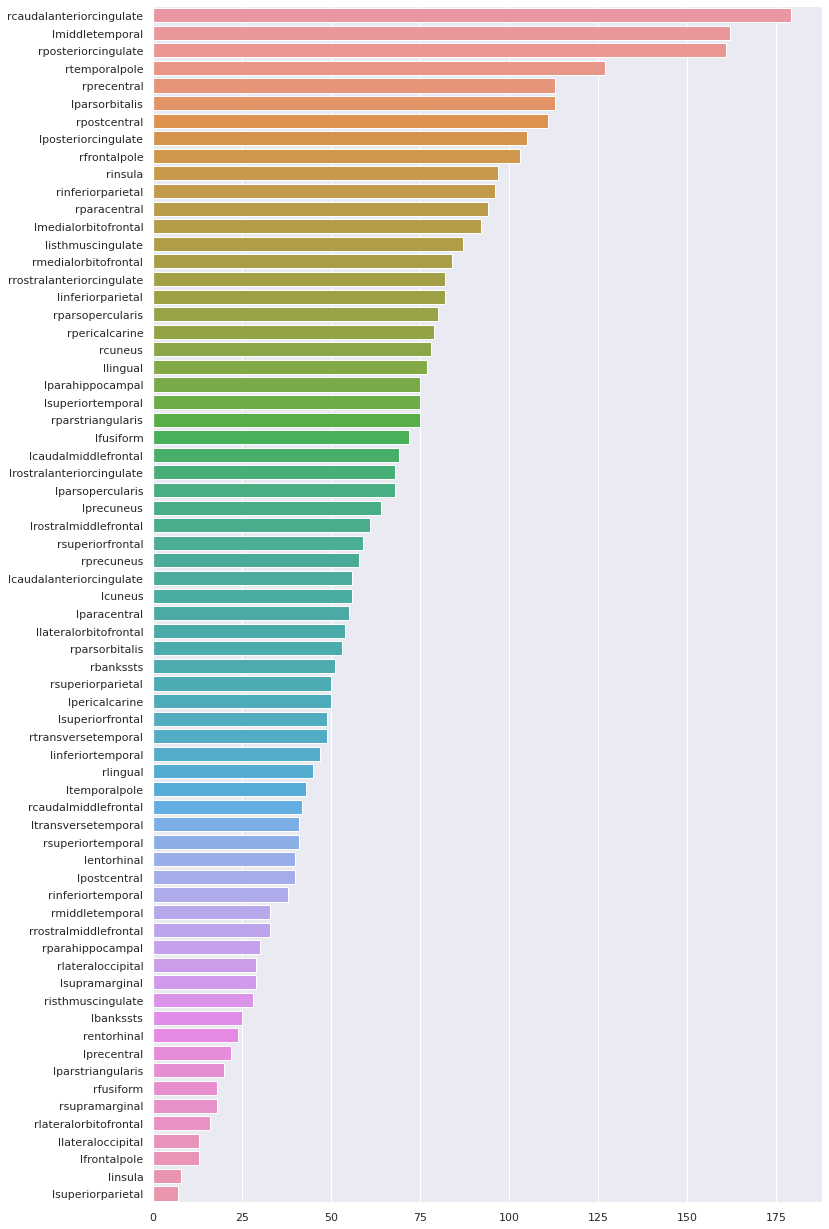

In [69]:
plt.figure(figsize=(12, 22))
sns.barplot(y=bname, x=cnt)

# Analyzing features of best_data_dict 

In [35]:
def feats_analyze(sev_data_dict: dict) -> dict:
    # for behavioral
    breg_cntr = {beh: defaultdict(int) for beh in sev_data_dict.keys()}
    for beh, beh_dict in sev_data_dict.items():
        brain_regions = list(map(lambda x: x.split('_')[1], beh_dict['feats']))
        for b in brain_regions:
            breg_cntr[beh][b] += 1
    return breg_cntr

In [40]:
breg_mild = feats_analyze(best_data_dict['mild_TD'])
breg_mod = feats_analyze(best_data_dict['moderate_TD'])
breg_sever = feats_analyze(best_data_dict['sever_TD'])

In [38]:
len(breg_mild['awa']), len(breg_mild['comm']), len(breg_mild['awa']),len(breg_mild['man']), len(breg_mild['cog']), len(breg_mild['mot']), len(breg_mild['tot'])

(64, 44, 64, 58, 53, 50, 59)

In [41]:
len(breg_mod['awa']), len(breg_mod['comm']), len(breg_mod['awa']),len(breg_mod['man']), len(breg_mod['cog']), len(breg_mod['mot']), len(breg_mod['tot'])

(68, 54, 68, 64, 62, 64, 64)

In [42]:
len(breg_sever['awa']), len(breg_sever['comm']), len(breg_sever['awa']),len(breg_sever['man']), len(breg_sever['cog']), len(breg_sever['mot']), len(breg_sever['tot'])

(62, 65, 62, 63, 68, 63, 66)

In [48]:
best_data_dict['mild_TD']['awa']

{'exp': 'experiment_adj59',
 'sev': 'mild_TD',
 'beh': 'awa',
 'rfe': 'lsvm',
 'clc': 'svm',
 'feats': ['area_lbankssts_PERC20',
  'area_lentorhinal_PERC60',
  'area_lentorhinal_PERC80',
  'area_lfusiform_PERC60',
  'area_lfusiform_PERC80',
  'area_linferiortemporal_PERC80',
  'area_listhmuscingulate_PERC40',
  'area_llateralorbitofrontal_PERC20',
  'area_llateralorbitofrontal_PERC60',
  'area_llateralorbitofrontal_PERC80',
  'area_llingual_PERC60',
  'area_llingual_PERC80',
  'area_lparsopercularis_PERC20',
  'area_lparsopercularis_PERC40',
  'area_lparstriangularis_PERC40',
  'area_lparstriangularis_PERC60',
  'area_lparstriangularis_PERC80',
  'area_lpostcentral_PERC40',
  'area_lpostcentral_PERC60',
  'area_lpostcentral_PERC80',
  'area_lprecentral_PERC20',
  'area_lprecuneus_PERC20',
  'area_lrostralanteriorcingulate_PERC60',
  'area_lsupramarginal_PERC60',
  'area_ltemporalpole_PERC40',
  'area_ltemporalpole_PERC60',
  'area_ltransversetemporal_PERC20',
  'area_ltransversetempora

In [26]:
best_data_dict['mild_TD']['awa']

{'exp': 'experiment_adj59',
 'sev': 'mild_TD',
 'beh': 'awa',
 'rfe': 'lsvm',
 'clc': 'svm',
 'feats': ['area_lbankssts_PERC20',
  'area_lentorhinal_PERC60',
  'area_lentorhinal_PERC80',
  'area_lfusiform_PERC60',
  'area_lfusiform_PERC80',
  'area_linferiortemporal_PERC80',
  'area_listhmuscingulate_PERC40',
  'area_llateralorbitofrontal_PERC20',
  'area_llateralorbitofrontal_PERC60',
  'area_llateralorbitofrontal_PERC80',
  'area_llingual_PERC60',
  'area_llingual_PERC80',
  'area_lparsopercularis_PERC20',
  'area_lparsopercularis_PERC40',
  'area_lparstriangularis_PERC40',
  'area_lparstriangularis_PERC60',
  'area_lparstriangularis_PERC80',
  'area_lpostcentral_PERC40',
  'area_lpostcentral_PERC60',
  'area_lpostcentral_PERC80',
  'area_lprecentral_PERC20',
  'area_lprecuneus_PERC20',
  'area_lrostralanteriorcingulate_PERC60',
  'area_lsupramarginal_PERC60',
  'area_ltemporalpole_PERC40',
  'area_ltemporalpole_PERC60',
  'area_ltransversetemporal_PERC20',
  'area_ltransversetempora